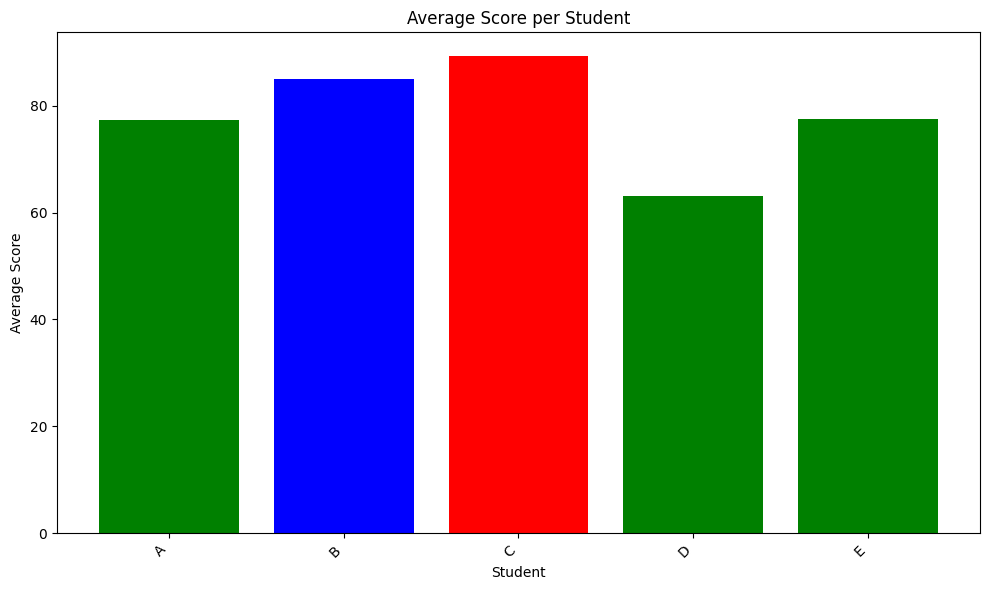

/tmp/ipython-input-20-4049068220.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[2][['Math', 'Science', 'English', 'History']].plot(kind='pie', autopct='%1.1f%%')


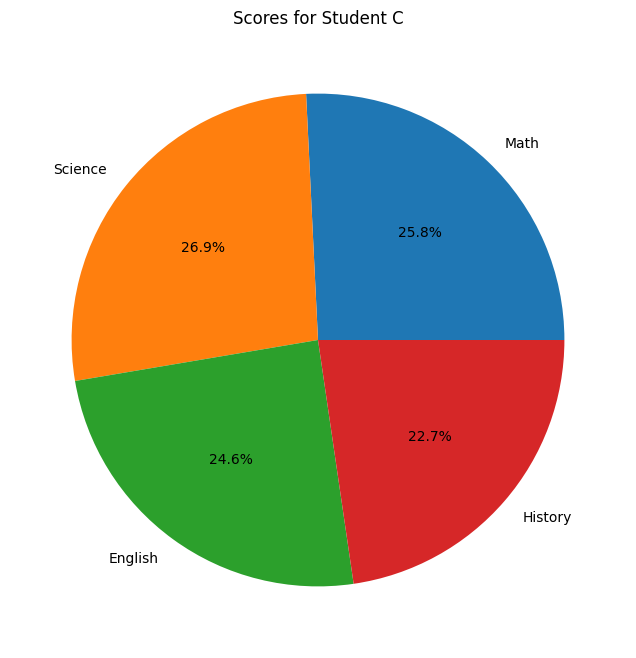

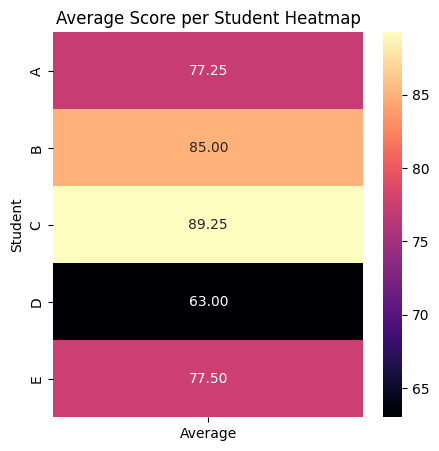

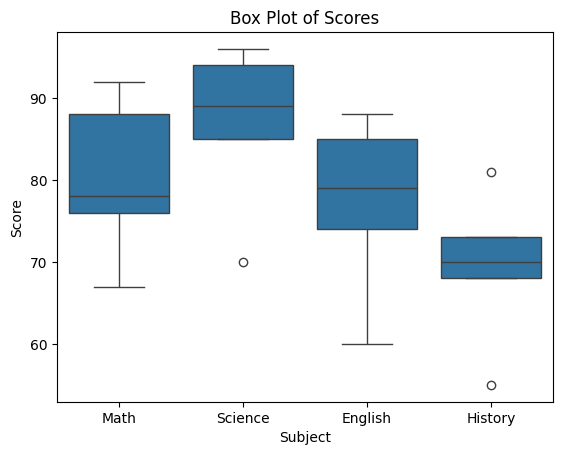

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/student_scores.csv - Sheet1.csv")
#print(df.head())
#print(df.shape)
#print(df.info())
#print(df.describe())
#hi_sci_score=df[df["Science"]>=85]
#print(hi_sci_score[["Student","Science"]])
total = df[['Math', 'Science', 'English', 'History']].sum(axis=1)
df['Total'] = total
#print(df)
average=df[['Math', 'Science', 'English', 'History']].mean(axis=1)
df['Average'] = average
#print(df)
#max_average=df['Average'].max()
#print(df[df['Average']==max_average])
#min_average=df['Average'].min()
#print(df[df['Average']==min_average])

# Bar chart for Average Score
top_two=df['Average'].nlargest(2)
colors=[]
for avg in df['Average']:
  if avg == top_two.values[0]:
    colors.append('red')
  elif avg == top_two.values[1]:
    colors.append('blue')
  else:
    colors.append('green')
plt.figure(figsize=(10, 6))
plt.bar(df['Student'],df['Average'], color=colors)
plt.xlabel('Student')
plt.ylabel('Average Score')
plt.title('Average Score per Student')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#pie chart for Student C
plt.figure(figsize=(8, 8)) # Create a new figure for the pie chart
df.iloc[2][['Math', 'Science', 'English', 'History']].plot(kind='pie', autopct='%1.1f%%')
plt.title('Scores for Student C')
plt.ylabel('') # Remove default y-label
plt.show()

#creating heatmap of average scores
plt.figure(figsize=(5, 5))
# Reshape the average series into a DataFrame for the heatmap
average_df = df[['Student', 'Average']].set_index('Student')
sns.heatmap(average_df, annot=True, cmap='magma', fmt=".2f")
plt.title('Average Score per Student Heatmap')
plt.show()

#boxplot
sns.boxplot(x='Subject', y='Score', data=pd.melt(df[['Math', 'Science', 'English', 'History']], value_vars=['Math', 'Science', 'English', 'History'], var_name='Subject', value_name='Score'))
plt.title('Box Plot of Scores')
plt.show()